In [1]:
!pip install haversine
!pip install shapely
!pip install geopandas
!pip install geojson
!pip install folium
!pip install tqdm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------------------

In [16]:
import requests
import random
import pandas as pd 
from tqdm import tqdm
from _config import APIKEY_HERE_PLATFORM, TITLE_APP_HERE_PLATFORM
import json 

import ast

# Tools

import folium
from shapely.geometry import Polygon
import numpy as np
import geojson
import folium
import matplotlib.pyplot as plt
import geopandas as gpd
from tqdm import tqdm
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import shapely.wkt
from haversine import haversine, Unit
import random
import time
from pyproj import Geod

from shapely import wkt
from geopandas import datasets, GeoDataFrame, read_file, points_from_xy
from geopandas.tools import overlay
from geopandas.tools import sjoin

from folium.plugins import MeasureControl
from folium.plugins import MarkerCluster

from tqdm import tqdm
import json

import requests
import random
import time 

In [2]:
df_map = pd.read_csv('DATASET_FINAL.csv')

In [3]:
df_map.head(2)

,departamentocodigo,departamentonombre,municipiocodigo,municipionombre,agente,bandera,direccion,producto,precio,estado,fecharegistro,FechaRegistroDate,Dir2,Full_Address,Coords
0,11,BOGOTA D.C.,11001,BOGOTA D.C.,ESTACION DE SERVICIO AUTOMOTRIZ PETROBRAS CALL...,PETROBRAS,CALLE 45 No. 16-30,GASOLINA CORRIENTE OXIGENADA,9230,1,05/01/2018 12:00:00 AM,2018-05-01 12:00:00,CALLE 45 No. 16-30,"CALLE 45 No. 16-30, Bogota d.c., Colombia","(4.63204, -74.06546)"
1,11,BOGOTA D.C.,11001,BOGOTA D.C.,ESTACION DE SERVICIO AUTOMOTRIZ PETROBRAS CALL...,PETROBRAS,CALLE 45 No. 16-30,BIODIESEL EXTRA,8440,1,05/01/2018 12:00:00 AM,2018-05-01 12:00:00,CALLE 45 No. 16-30,"CALLE 45 No. 16-30, Bogota d.c., Colombia","(4.63204, -74.06546)"


In [4]:
df_map = df_map.drop_duplicates(subset=['agente','bandera','producto'])

In [9]:
len(df_map)

1765

In [5]:
df_map['Coords'].value_counts()

Coords
('NA', 'NA')            314
(4.61117, -74.14659)      5
(6.25853, -75.58338)      5
(4.67463, -74.06666)      4
(4.68731, -74.04449)      4
                       ... 
(6.29335, -75.59467)      1
(6.29711, -75.54312)      1
(6.28006, -75.56187)      1
(6.18337, -75.65289)      1
(6.20994, -75.56904)      1
Name: count, Length: 452, dtype: int64

In [6]:
df_map[df_map['Coords']=="('NA', 'NA')"]['Dir2'].unique()

array(['AC 22 SUR No. 27-71', 'AVENIDA PRIMERA DE MAYO No. 49A-75',
       'AC 24 No. 59-60', 'CALLE 46A SUR No 49-49',
       'DIAGONAL 62 SUR No. 22-46', 'CALLE 50 No. 57-34',
       'CALLE 42A SUR No. 89A-95', 'AVENIDA 1 No. 13-40',
       'Calle 19 No 33 - 68', 'DIAGONAL  62 SUR No. 21A-36',
       'CARRERA 52 No 11A SUR - 21', 'AVENIDA CARRERA 1 No. 69A-10 SUR',
       'CARRERA 67 A NO 81 B-14', 'Carrera 70 No.1 Sur -26',
       'CARRERA 14 No. 101A-44 SUR', 'AVENIDA CIUDAD DE CALI No. 6-93',
       'TV 17 No.24-99', 'CARRERA 42 No. 54A-35',
       'AVENIDA CALLE 68 No. 19-84', 'CARRERA 3 No.  138F - 48 SUR',
       'TRANSVERSAL 73A No. 82H-55', 'CALLE 146 A No. 95B-67',
       'Carrera 3 Este No. 22 - 90 Sur', 'CALLE 63 No. 97-10',
       'Carrera 50 14 - 25', 'CALLE 40 SUR 73 - 12',
       'CALLE 170 No. 64-47', 'Carrera 87 C No 31A 45',
       'CALLE 80 No. 69 Q-50', 'Calle 22 No.14-07',
       'CALLE 64 N° 113 A 95', 'AK 7 No. 46-21', 'CARRERA 50 No. 27B-51',
       'Calle 50 

In [24]:
df_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   departamentocodigo  1765 non-null   int64 
 1   departamentonombre  1765 non-null   object
 2   municipiocodigo     1765 non-null   int64 
 3   municipionombre     1765 non-null   object
 4   agente              1765 non-null   object
 5   bandera             1765 non-null   object
 6   direccion           1765 non-null   object
 7   producto            1765 non-null   object
 8   precio              1765 non-null   int64 
 9   estado              1765 non-null   int64 
 10  fecharegistro       1765 non-null   object
 11  FechaRegistroDate   1765 non-null   object
 12  Dir2                1765 non-null   object
 13  Full_Address        1765 non-null   object
 14  Coords              1765 non-null   object
dtypes: int64(4), object(11)
memory usage: 207.0+ KB


In [25]:
df_map['Coords'][0]

'(4.63204, -74.06546)'

In [26]:
float(df_map['Coords'][0].replace('(','').replace(')','').split(',')[0]) # Lat

4.63204

In [27]:
float(df_map['Coords'][0].replace('(','').replace(')','').split(',')[1].strip()) # Longitud

-74.06546

In [7]:
df_map['LAT'] = df_map['Coords'].apply(lambda x : float(x.replace('(','').replace(')','').split(',')[0]) if x !=  "('NA', 'NA')"  else 'Empty')
df_map['LNG'] = df_map['Coords'].apply(lambda x : float(x.replace('(','').replace(')','').split(',')[1]) if x !=  "('NA', 'NA')"  else 'Empty')

In [29]:
df_map['LAT'].value_counts()

LAT
Empty      314
4.64499      8
4.61255      7
4.6169       7
6.25853      5
          ... 
6.23189      1
6.32746      1
6.28006      1
6.18337      1
6.29711      1
Name: count, Length: 449, dtype: int64

In [30]:
df_map['LNG'].value_counts()

LNG
Empty        314
-74.0801       6
-75.58338      5
-74.08863      5
-74.09248      5
            ... 
-75.56008      1
-75.54312      1
-75.65289      1
-75.56904      1
-75.56187      1
Name: count, Length: 449, dtype: int64

# Funciones a usar 

In [30]:
def GetLatLon2_here(Address,YOUR_API_KEY):
    url2_geocode  = f'https://geocode.search.hereapi.com/v1/geocode?q={Address}&apiKey='+YOUR_API_KEY
    
    try:
        response = requests.get(url2_geocode).json()
        CleanAddress = response['items'][0]['title'].upper()
        LAT = response['items'][0]['position']['lat']
        LON = response['items'][0]['position']['lng']
        results = [CleanAddress,round(LAT,7),round(LON,7)]
    except:
        results = ['NotFound','NA','NA']
    return results


def GetLatLon2_google(Address,YOUR_API_KEY):
    api_url = f'https://maps.googleapis.com/maps/api/geocode/json?address={Address}&key={YOUR_API_KEY}'
    try:
        j = requests.get(api_url).json()
        CleanAddress = str(j['results'][0]['formatted_address']).upper()
        LAT = j['results'][0]['geometry']['location']['lat']
        LON = j['results'][0]['geometry']['location']['lng']
        results = [CleanAddress,round(LAT,7),round(LON,7)]
    except:
        results = ['NotFound','NA','NA']
    return results,j 


def cal_dist(geo_source,point2,unit):
    if unit == 'Km':
        distance = haversine(geo_source, point2,Unit.KILOMETERS)
    elif unit == 'm':
        distance = haversine(geo_source, point2,Unit.METERS)
    elif unit == 'miles':
        distance = haversine(geo_source, point2,Unit.MILES)
    
    return round(distance,2)


def distance_estac(geo_source,df,radio,unit):
    distancia = []
    source = []

    for i in tqdm(range(len(df)),colour = 'green'):
        distancia.append(cal_dist(geo_source,df['POINT'][i],unit))
        source.append(geo_source)

    new_df = df.copy()
    new_df['SOURCE'] = source
    new_df['DISTANCE'] = distancia
    new_df = new_df[new_df['DISTANCE']<=radio]
    new_df = new_df.reset_index()
    new_df = new_df.drop(columns ='index')
    return new_df.sort_values(by='DISTANCE',ascending=True)
    

def transform_df_map(df):
    coordenadas = []

    for i in range(len(df)):
        try:
            coord = float(df['LAT'][i]),float(df['LNG'][i])
            coordenadas.append(coord)
        except:
            coordenadas.append('EMPTY')
            
    df['POINT'] = coordenadas
    df = df[df['POINT']!='EMPTY']
    df = df.reset_index()
    df = df.drop(columns = 'index')
    new_df = df.copy()
    
    return new_df

# Paso a Paso de la App

1. Filtrar la ciudad
2. Ingresar la central location
3. Configurar el radio y la unidad de medida
4. Calcular la distancia


# Filtrar ciudad

In [9]:
cities = list(df_map['municipionombre'].unique())
cities

['BOGOTA D.C.', 'MEDELLIN', 'SABANETA', 'ENVIGADO', 'BELLO', 'ITAGUI']

In [10]:
df_city = df_map[df_map['municipionombre']==cities[0]] #Solo Bogotá
df_city.reset_index(inplace =  True)
df_city.drop(columns= 'index' , inplace = True)

C:\Users\pc\AppData\Local\Temp\ipykernel_15844\750121349.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_city.drop(columns= 'index' , inplace = True)


In [11]:
df_city.head(2)

,departamentocodigo,departamentonombre,municipiocodigo,municipionombre,agente,bandera,direccion,producto,precio,estado,fecharegistro,FechaRegistroDate,Dir2,Full_Address,Coords,LAT,LNG
0,11,BOGOTA D.C.,11001,BOGOTA D.C.,ESTACION DE SERVICIO AUTOMOTRIZ PETROBRAS CALL...,PETROBRAS,CALLE 45 No. 16-30,GASOLINA CORRIENTE OXIGENADA,9230,1,05/01/2018 12:00:00 AM,2018-05-01 12:00:00,CALLE 45 No. 16-30,"CALLE 45 No. 16-30, Bogota d.c., Colombia","(4.63204, -74.06546)",4.63204,-74.06546
1,11,BOGOTA D.C.,11001,BOGOTA D.C.,ESTACION DE SERVICIO AUTOMOTRIZ PETROBRAS CALL...,PETROBRAS,CALLE 45 No. 16-30,BIODIESEL EXTRA,8440,1,05/01/2018 12:00:00 AM,2018-05-01 12:00:00,CALLE 45 No. 16-30,"CALLE 45 No. 16-30, Bogota d.c., Colombia","(4.63204, -74.06546)",4.63204,-74.06546


In [21]:
central_location = 'CC Multiplaza , Bogotá D.C.'
central_location = central_location.replace('#','No')
central_location

'CC Multiplaza , Bogotá D.C.'

In [22]:
R = GetLatLon2_here(central_location,APIKEY_HERE_PLATFORM)

In [23]:
geo_source = R[1],R[2]
geo_source

(4.65164, -74.12509)

In [24]:
radio = 1
unit = 'Km'

In [29]:
df_city =  transform_df_map(df_city)
df_city.head(2)

C:\Users\pc\AppData\Local\Temp\ipykernel_15844\226766893.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['POINT'] = coordenadas


,departamentocodigo,departamentonombre,municipiocodigo,municipionombre,agente,bandera,direccion,producto,precio,estado,fecharegistro,FechaRegistroDate,Dir2,Full_Address,Coords,LAT,LNG,POINT
0,11,BOGOTA D.C.,11001,BOGOTA D.C.,ESTACION DE SERVICIO AUTOMOTRIZ PETROBRAS CALL...,PETROBRAS,CALLE 45 No. 16-30,GASOLINA CORRIENTE OXIGENADA,9230,1,05/01/2018 12:00:00 AM,2018-05-01 12:00:00,CALLE 45 No. 16-30,"CALLE 45 No. 16-30, Bogota d.c., Colombia","(4.63204, -74.06546)",4.63204,-74.06546,"(4.63204, -74.06546)"
1,11,BOGOTA D.C.,11001,BOGOTA D.C.,ESTACION DE SERVICIO AUTOMOTRIZ PETROBRAS CALL...,PETROBRAS,CALLE 45 No. 16-30,BIODIESEL EXTRA,8440,1,05/01/2018 12:00:00 AM,2018-05-01 12:00:00,CALLE 45 No. 16-30,"CALLE 45 No. 16-30, Bogota d.c., Colombia","(4.63204, -74.06546)",4.63204,-74.06546,"(4.63204, -74.06546)"


In [31]:
df_city['POINT'][0]

(4.63204, -74.06546)

In [32]:
results = distance_estac(geo_source,df_city,radio,unit)
results.reset_index(inplace =  True)
results.drop(columns= 'index' , inplace = True)

100%|███████████████████████████████████████████████████████████████████████████| 1056/1056 [00:00<00:00, 18210.76it/s]


In [33]:
results

,departamentocodigo,departamentonombre,municipiocodigo,municipionombre,agente,bandera,direccion,producto,precio,estado,fecharegistro,FechaRegistroDate,Dir2,Full_Address,Coords,LAT,LNG,POINT,SOURCE,DISTANCE
0,11,BOGOTA D.C.,11001,BOGOTA D.C.,EDS ESSO INDUSTRIAL BOYACA,MOBIL,CARRERA 71 No. 19-05,GASOLINA CORRIENTE OXIGENADA,9090,1,05/02/2018 12:00:00 AM,2018-05-02 12:00:00,CARRERA 71 No. 19-05,"CARRERA 71 No. 19-05, Bogota d.c., Colombia","(4.65127, -74.1234)",4.65127,-74.1234,"(4.65127, -74.1234)","(4.65164, -74.12509)",0.19
1,11,BOGOTA D.C.,11001,BOGOTA D.C.,EDS ESSO INDUSTRIAL BOYACA,MOBIL,CARRERA 71 No. 19-05,BIODIESEL EXTRA,9190,1,05/02/2018 12:00:00 AM,2018-05-02 12:00:00,CARRERA 71 No. 19-05,"CARRERA 71 No. 19-05, Bogota d.c., Colombia","(4.65127, -74.1234)",4.65127,-74.1234,"(4.65127, -74.1234)","(4.65164, -74.12509)",0.19
2,11,BOGOTA D.C.,11001,BOGOTA D.C.,EDS ESSO INDUSTRIAL BOYACA,MOBIL,CARRERA 71 No. 19-05,BIOACEM AL 9%,8390,1,05/02/2018 12:00:00 AM,2018-05-02 12:00:00,CARRERA 71 No. 19-05,"CARRERA 71 No. 19-05, Bogota d.c., Colombia","(4.65127, -74.1234)",4.65127,-74.1234,"(4.65127, -74.1234)","(4.65164, -74.12509)",0.19
3,11,BOGOTA D.C.,11001,BOGOTA D.C.,EDS ESSO INDUSTRIAL BOYACA,MOBIL,CARRERA 71 No. 19-05,GASOLINA EXTRA OXIGENADA,11990,1,05/02/2018 12:00:00 AM,2018-05-02 12:00:00,CARRERA 71 No. 19-05,"CARRERA 71 No. 19-05, Bogota d.c., Colombia","(4.65127, -74.1234)",4.65127,-74.1234,"(4.65127, -74.1234)","(4.65164, -74.12509)",0.19
4,11,BOGOTA D.C.,11001,BOGOTA D.C.,ESTACION DE SERVICIO FERROCARRIL,PETROBRAS,CARRERA 72 No. 21-53,BIODIESEL EXTRA,8440,1,05/02/2018 12:00:00 AM,2018-05-02 12:00:00,CARRERA 72 No. 21-53,"CARRERA 72 No. 21-53, Bogota d.c., Colombia","(4.65451, -74.12231)",4.65451,-74.12231,"(4.65451, -74.12231)","(4.65164, -74.12509)",0.44
5,11,BOGOTA D.C.,11001,BOGOTA D.C.,ESTACION DE SERVICIO FERROCARRIL,PETROBRAS,CARRERA 72 No. 21-53,GASOLINA CORRIENTE OXIGENADA,11990,1,05/02/2018 12:00:00 AM,2018-05-02 12:00:00,CARRERA 72 No. 21-53,"CARRERA 72 No. 21-53, Bogota d.c., Colombia","(4.65451, -74.12231)",4.65451,-74.12231,"(4.65451, -74.12231)","(4.65164, -74.12509)",0.44
6,11,BOGOTA D.C.,11001,BOGOTA D.C.,ESTACION DE SERVICIO FERROCARRIL,PETROBRAS,CARRERA 72 No. 21-53,GASOLINA EXTRA OXIGENADA,9090,1,05/02/2018 12:00:00 AM,2018-05-02 12:00:00,CARRERA 72 No. 21-53,"CARRERA 72 No. 21-53, Bogota d.c., Colombia","(4.65451, -74.12231)",4.65451,-74.12231,"(4.65451, -74.12231)","(4.65164, -74.12509)",0.44
7,11,BOGOTA D.C.,11001,BOGOTA D.C.,ESTACION DE SERVICIO FERROCARRIL,PETROBRAS,CARRERA 72 No. 21-53,BIOACEM AL 9%,8440,1,05/02/2018 12:00:00 AM,2018-05-02 12:00:00,CARRERA 72 No. 21-53,"CARRERA 72 No. 21-53, Bogota d.c., Colombia","(4.65451, -74.12231)",4.65451,-74.12231,"(4.65451, -74.12231)","(4.65164, -74.12509)",0.44
8,11,BOGOTA D.C.,11001,BOGOTA D.C.,EDS CALLE 13,PETROBRAS,CALLE 13 No. 69 B-88,BIODIESEL EXTRA,8400,1,05/02/2018 12:00:00 AM,2018-05-02 12:00:00,CALLE 13 No. 69 B-88,"CALLE 13 No. 69 B-88, Bogota d.c., Colombia","(4.64593, -74.12418)",4.64593,-74.12418,"(4.64593, -74.12418)","(4.65164, -74.12509)",0.64
9,11,BOGOTA D.C.,11001,BOGOTA D.C.,EDS CALLE 13,PETROBRAS,CALLE 13 No. 69 B-88,GASOLINA CORRIENTE OXIGENADA,9080,1,05/02/2018 12:00:00 AM,2018-05-02 12:00:00,CALLE 13 No. 69 B-88,"CALLE 13 No. 69 B-88, Bogota d.c., Colombia","(4.64593, -74.12418)",4.64593,-74.12418,"(4.64593, -74.12418)","(4.65164, -74.12509)",0.64


In [34]:
results['agente'].unique()

array(['EDS ESSO INDUSTRIAL BOYACA', 'ESTACION DE SERVICIO FERROCARRIL',
       'EDS CALLE 13', 'ESTACION DE SERVICIO MILENIUM GAS CALLE 13',
       'ESTACION DE SERVICIO VILLA ALSACIA',
       'ESTACION DE SERVICIO DISTRACOM EL TERMINAL BOGOTA'], dtype=object)

In [35]:
results['producto'].unique()

array(['GASOLINA CORRIENTE OXIGENADA', 'BIODIESEL EXTRA', 'BIOACEM AL 9%',
       'GASOLINA EXTRA OXIGENADA'], dtype=object)

In [36]:
type(results)

pandas.core.frame.DataFrame

In [37]:
gdf_results = GeoDataFrame(results,
                          geometry =  points_from_xy(results.LNG,results.LAT))

In [38]:
type(gdf_results)

geopandas.geodataframe.GeoDataFrame

In [39]:
gdf_results.head(2)

,departamentocodigo,departamentonombre,municipiocodigo,municipionombre,agente,bandera,direccion,producto,precio,estado,...,FechaRegistroDate,Dir2,Full_Address,Coords,LAT,LNG,POINT,SOURCE,DISTANCE,geometry
0,11,BOGOTA D.C.,11001,BOGOTA D.C.,EDS ESSO INDUSTRIAL BOYACA,MOBIL,CARRERA 71 No. 19-05,GASOLINA CORRIENTE OXIGENADA,9090,1,...,2018-05-02 12:00:00,CARRERA 71 No. 19-05,"CARRERA 71 No. 19-05, Bogota d.c., Colombia","(4.65127, -74.1234)",4.65127,-74.1234,"(4.65127, -74.1234)","(4.65164, -74.12509)",0.19,POINT (-74.12340 4.65127)
1,11,BOGOTA D.C.,11001,BOGOTA D.C.,EDS ESSO INDUSTRIAL BOYACA,MOBIL,CARRERA 71 No. 19-05,BIODIESEL EXTRA,9190,1,...,2018-05-02 12:00:00,CARRERA 71 No. 19-05,"CARRERA 71 No. 19-05, Bogota d.c., Colombia","(4.65127, -74.1234)",4.65127,-74.1234,"(4.65127, -74.1234)","(4.65164, -74.12509)",0.19,POINT (-74.12340 4.65127)


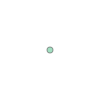

In [40]:
gdf_results['geometry'][0]

In [42]:
oil = list(gdf_results['producto'].unique())
oil

['GASOLINA CORRIENTE OXIGENADA',
 'BIODIESEL EXTRA',
 'BIOACEM AL 9%',
 'GASOLINA EXTRA OXIGENADA']

In [44]:
gdf_results_2 = gdf_results[gdf_results['producto']==oil[1]]
gdf_results_2.reset_index(inplace =  True)
gdf_results_2.drop(columns= 'index' , inplace = True)

C:\Users\pc\AppData\Local\Temp\ipykernel_15844\619817515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdf_results_2.drop(columns= 'index' , inplace = True)


In [45]:
gdf_results_2.columns

Index(['departamentocodigo', 'departamentonombre', 'municipiocodigo',
       'municipionombre', 'agente', 'bandera', 'direccion', 'producto',
       'precio', 'estado', 'fecharegistro', 'FechaRegistroDate', 'Dir2',
       'Full_Address', 'Coords', 'LAT', 'LNG', 'POINT', 'SOURCE', 'DISTANCE',
       'geometry'],
      dtype='object')

In [47]:
gdf_results_2['precio'].min()

8000

In [48]:
gdf_results_2['precio'].max()

9190

In [26]:
def marker_rest(df,mapa,unit,oil,icono):
    
    df = df[df['Producto']==oil]
    df = df.reset_index()
    df = df.drop(columns = 'index')
    
    for i in range(len(df)):
        
        if df['Precio'][i]==df['Precio'].min():
        
            html =  f"""<b>MARCA:</b> {df.Bandera[i]} <br>
                    <b>NAME:</b> {df.Nombre_comercial[i]} <br>
                    <b>PRODUCTO:</b> {df.Producto[i]} <br>
                    <b>PRECIO:</b> {df.Precio[i]} <br>
                    <b>DISTANCE:</b> {round(df.DISTANCE[i],2)}<br>
                    <b>DIRECCION:</b> {df.Direccion[i]}<br>
                    <b>UNIT:</b> {unit}<br>"""
            iframe = folium.IFrame(html,figsize=(6, 3))
            popup = folium.Popup(iframe)
            



            folium.Marker(location=[float(df['LAT'][i]),float(df['LNG'][i])],
                               icon=folium.Icon(color='darkgreen', icon_color='white',
                               icon=icono, prefix='glyphicon'),
                               popup = popup).add_to(mapa)
        
        elif df['Precio'][i]==df['Precio'].max():
        
            html =  f"""<b>MARCA:</b> {df.Bandera[i]} <br>
                    <b>NAME:</b> {df.Nombre_comercial[i]} <br>
                    <b>PRODUCTO:</b> {df.Producto[i]} <br>
                    <b>PRECIO:</b> {df.Precio[i]} <br>
                    <b>DISTANCE:</b> {round(df.DISTANCE[i],2)}<br>
                    <b>DIRECCION:</b> {df.Direccion[i]}<br>
                    <b>UNIT:</b> {unit}<br>"""
            iframe = folium.IFrame(html,figsize=(6, 3))
            popup = folium.Popup(iframe)



            folium.Marker(location=[float(df['LAT'][i]),float(df['LNG'][i])],
                               icon=folium.Icon(color='darkred', icon_color='white',
                               icon=icono, prefix='glyphicon'),
                               popup =popup).add_to(mapa)
        else :
            html =  f"""<b>MARCA:</b> {df.Bandera[i]} <br>
                    <b>NAME:</b> {df.Nombre_comercial[i]} <br>
                    <b>PRODUCTO:</b> {df.Producto[i]} <br>
                    <b>PRECIO:</b> {df.Precio[i]} <br>
                    <b>DISTANCE:</b> {round(df.DISTANCE[i],2)}<br>
                    <b>DIRECCION:</b> {df.Direccion[i]}<br>
                    <b>UNIT:</b> {unit}<br>"""
            iframe = folium.IFrame(html,figsize=(6, 3))
            popup = folium.Popup(iframe)



            folium.Marker(location=[float(df['LAT'][i]),float(df['LNG'][i])],
                               icon=folium.Icon(color='orange', icon_color='white',
                               icon=icono, prefix='glyphicon'),
                               popup =popup).add_to(mapa)
                           
    return

# Show Map

In [28]:
m = folium.Map([geo_source[0],geo_source[1]], zoom_start= 15)

folium.Circle(
    
    radius = int(radio)*1000,
    location = [geo_source[0],geo_source[1]],
    color = 'green',
    fill = 'green'

).add_to(m)

folium.Marker(

            location = [geo_source[0],geo_source[1]],
            icon =  folium.Icon(color='black',icon_color='white',
            icon = "home",prefix = 'glyphicon'),
            popup = "<b>Centroid</b>").add_to(m)

# marker_rest(gdf_results_2,m,unit,oil[1],'usd')

m